In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('/Users/seohyeonlee/p-ollution/data/disease.csv')
df.head()

,Unnamed: 0,disease_code,region,2020.01 num_patients,len_hospital_stay,num_insurance_claims,total_insurance_cost,outpocket_cost,2020.02 num_patients,len_hospital_stay.1,...,num_insurance_claims.34,total_insurance_cost.34,outpocket_cost.34,2022.12 num_patients,len_hospital_stay.35,num_insurance_claims.35,total_insurance_cost.35,outpocket_cost.35,region.1,disease_code
0,Total J411,J411,Total,23217,33143,32755,594281,451372,15506,22823,...,11326,224021,172093,10595,13933,13829,279185,215034,계,J411
1,Seoul J411,J411,Seoul,2699,3642,3642,63931,45874,1706,2402,...,1665,32560,23378,1524,1940,1941,36813,26866,서울,J411
2,Busan J411,J411,Busan,1346,2049,2045,33118,25678,835,1323,...,702,11793,9502,633,881,878,16849,13988,부산,J411
3,Incheon J411,J411,Incheon,1609,2353,2346,40351,30146,826,1199,...,477,9450,7022,499,638,638,13457,9920,인천,J411
4,Daegu J411,J411,Daegu,1014,1586,1576,29360,22612,663,1104,...,443,8873,7197,366,538,538,11534,9286,대구,J411


In [18]:
groupby_code = df.loc[df['region']=='Total'].groupby('disease_code').sum()
filter_condition =  [col for col in df.columns if 'len_hospital_stay' in col]
filtered_df = groupby_code[filter_condition].head()



In [17]:
# Create a datetime index with a frequency of 'MS' (month start)
date_range = pd.date_range('2020-01', '2022-12', freq='MS')

# Extract year and month as strings in 'YYYY-MM' format
date_list = [date.strftime('%Y.%m') for date in date_range]

# Display the resulting list of datetime objects
print(date_list)

['2020.01', '2020.02', '2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08', '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02', '2021.03', '2021.04', '2021.05', '2021.06', '2021.07', '2021.08', '2021.09', '2021.10', '2021.11', '2021.12', '2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06', '2022.07', '2022.08', '2022.09', '2022.10', '2022.11', '2022.12']


In [24]:
filtered_df.columns = date_list
numpatients_by_disease = filtered_df.transpose()
numpatients_by_disease

disease_code,I109,I269,I693,J180,J340
2020.01,3887467,16259,41863,107264,56948
2020.02,3724489,12679,37541,65088,41924
2020.03,3796250,13983,40037,38928,31851
2020.04,3720591,13779,37155,27048,31519
2020.05,3843873,13373,37905,29113,30452
2020.06,3895894,13832,36914,31210,26451
2020.07,3923646,15102,32956,28993,24056
2020.08,3734263,14276,32184,25025,21306
2020.09,3988882,14407,31612,24728,31345
2020.10,3719846,14828,32049,28360,34447


In [43]:
import matplotlib.pyplot as plt

In [83]:

def plot_numpatients(disease_code, axes, ax_idx):
    s = numpatients_by_disease[disease_code]
    s.index
    num_patients = s.values.astype('int')

    ym = pd.to_datetime(s.index)
    axes[ax_idx].plot(ym, num_patients, color='blue', linestyle='dashed',
     linewidth=2)
    print('plotted ', disease_code)

/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_16596/2180390116.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ym = pd.to_datetime(s.index)
/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_16596/2180390116.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ym = pd.to_datetime(s.index)
/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_16596/2180390116.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ym = pd.to_datetime(s.index)
/var/folders/lq/dt070ydd3h13pqgrgy6rpv300000gn/T/ipykernel_16596/2180390116.py:6: UserWarning: Could not infe

plotted  I109
plotted  I269
plotted  I693
plotted  J180
plotted  J340


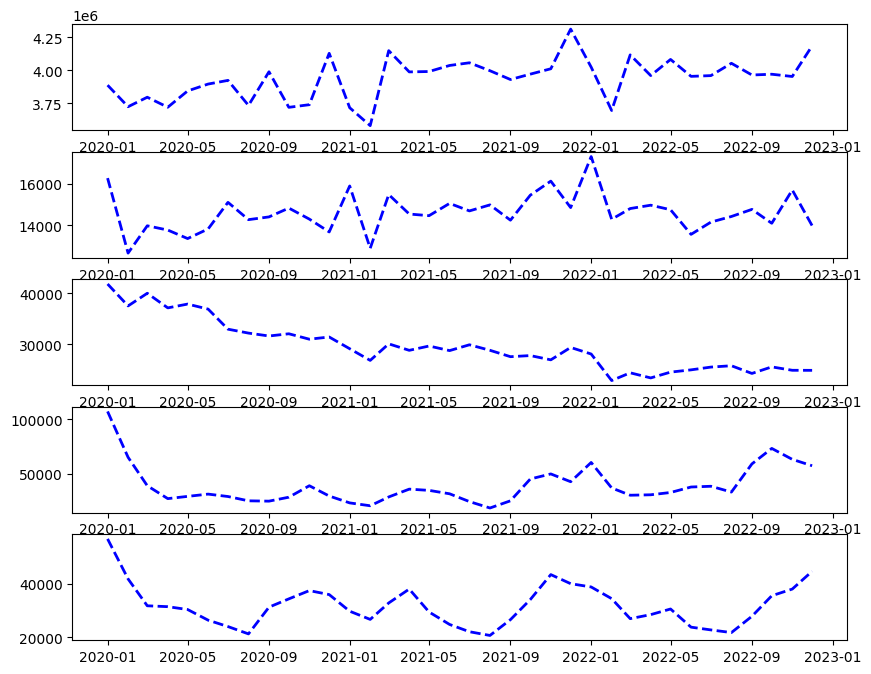

In [84]:
diseases = numpatients_by_disease.columns
fig, axes = plt.subplots(nrows=len(diseases), ncols=1, figsize=(10, 8))

for idx , item in enumerate(diseases):
    plot_numpatients(item, axes, idx)
    

<Axes: >

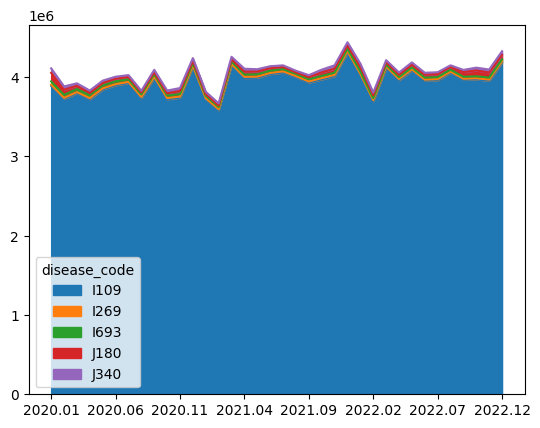

In [88]:
numpatients_by_disease.astype('int').plot.area()
#I109 (hypertension) contributes a disproportionate number of patients

<Axes: >

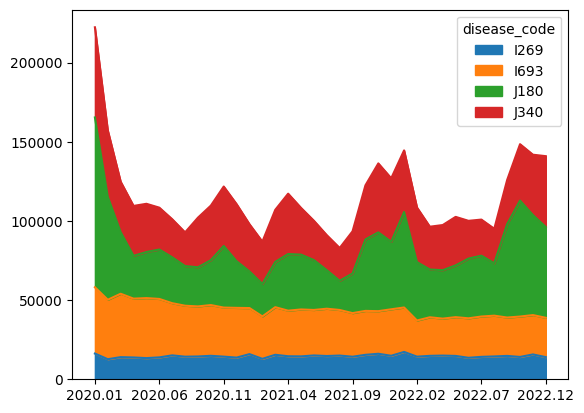

In [91]:
#stacked plot excluding I109 (hypertension)
numpatients_by_disease.astype('int').iloc[:, 1:].plot.area()

#J180 (bronchopneumonia) cases dropped. lookk into precovid data